$$ x_{uuu}(u) = - \frac{F_{xxx}x_u^3 + 3(F_{xxu}x_u^2+F_{xx}x_{uu}x_u+F_{xuu}x_u+F_{xu}x_{uu})+F_{uuu}}{F_x} $$


# Exercise 2

In [16]:
from scipy.optimize import fsolve
import numpy as np
import math

alpha = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24


def wagediff(p, *args):
    w = p
    k, = args
    pi = z*(k**alpha)*(k*((1-alpha)*z/w)**(1/alpha))**(1-alpha) - w*(k*((1-alpha)*z/w)**(1/alpha))
    diff = k*((1-alpha)*z/w)**(1/alpha) - (h - (b/(w*(1+b)))*(w*h + pi - t))
    
    return (diff)

w0 = fsolve(wagediff, (0.5), args = (k))
print("w: ", w0)

w:  [ 0.62736178]


In [24]:
eps = 1e-5
def wage(k):
    return fsolve(wagediff, (0.5), args = (k))

def wagediffeps(p, *args):
    w = p
    k, eps = args
    pi = z*((k+eps)**alpha)*((k+eps)*((1-alpha)*z/w)**(1/alpha))**(1-alpha) - w*((k+eps)*((1-alpha)*z/w)**(1/alpha))
    diff = (k+eps)*((1-alpha)*z/w)**(1/alpha) - (h - (b/(w*(1+b)))*(w*h + pi - t))
    
    return (diff)

def wageeps(k, eps):
    return fsolve(wagediffeps, (0.5), args = (k, eps))

def foc(k, eps):
    return (wageeps(k, eps) - wage(k))/eps

def soc(k, eps):
    return (wageeps(k, eps) - 2*wage(k) + wageeps(k, -eps))/(eps*eps)

def wagefirstord(k):
    return wage(5) + foc(5, eps)*(k - 5)

def wagesecondord(k):
    return wage(5) + foc(5, eps)*(k - 5) + (soc(5, eps)/2) * ((k - 5)**2)

print(foc(k,eps))
print(soc(k,eps))
print(wagefirstord(5))
print(wagesecondord(5))

[ 0.04158575]
[-0.00557443]
[ 0.62736178]
[ 0.62736178]


In [25]:
kgrid = np.linspace(1, 15, 15)
kvec = np.zeros((15,1))
for i in range(len(kgrid)):
    kvec[i] = wage(kgrid[i])

print(kvec)

[[ 0.36773727]
 [ 0.46294796]
 [ 0.52961667]
 [ 0.582631  ]
 [ 0.62736178]
 [ 0.66643541]
 [ 0.70135623]
 [ 0.73307572]
 [ 0.76223838]
 [ 0.78930333]
 [ 0.81461058]
 [ 0.83841973]
 [ 0.86093403]
 [ 0.88231593]
 [ 0.90269755]]


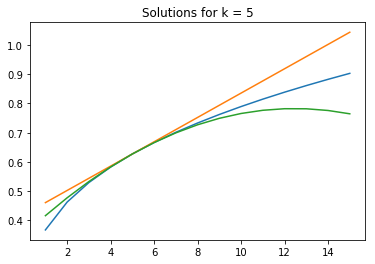

In [30]:
from matplotlib import pyplot as plt

kveclin = np.zeros((15,1))
kvecquad = np.zeros((15,1))

for i in range(len(kveclin)):
    kveclin[i] = wagefirstord(kgrid[i])

for i in range(len(kveclin)):
    kvecquad[i] = wagesecondord(kgrid[i])

plt.title("Solutions for k = 5")
plt.plot(kgrid, kvec, label="Actual")
plt.plot(kgrid, kveclin, label="First Order")
plt.plot(kgrid, kvecquad, label="Second Order")
plt.show()

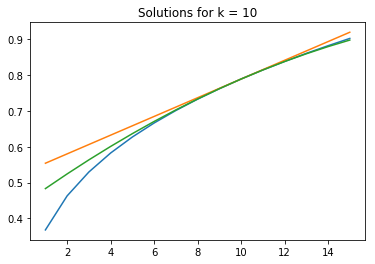

In [31]:
def wagefirstord2(k):
    return wage(10) + foc(10, eps)*(k - 10)

def wagesecondord2(k):
    return wage(10) + foc(10, eps)*(k - 10) + (soc(10, eps)/2) * ((k - 10)**2)


kvec2 = np.zeros((15,1))
kveclin2 = np.zeros((15,1))
kvecquad2 = np.zeros((15,1))

for i in range(len(kgrid)):
    kvec2[i] = wage(kgrid[i])

for i in range(len(kveclin2)):
    kveclin2[i] = wagefirstord2(kgrid[i])

for i in range(len(kveclin)):
    kvecquad2[i] = wagesecondord2(kgrid[i])

plt.title("Solutions for k = 10")
plt.plot(kgrid, kvec2, label="Actual")
plt.plot(kgrid, kveclin2, label="First Order")
plt.plot(kgrid, kvecquad2, label="Second Order")
plt.show()

# Exercise 3

First Order Coefficient:  0.5283629243021708
Second Order Coefficient:  0.0012920280685546222
Third Order Coefficient:  1.6242379249256295e-05


/Users/benjaminlim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power
/Users/benjaminlim/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


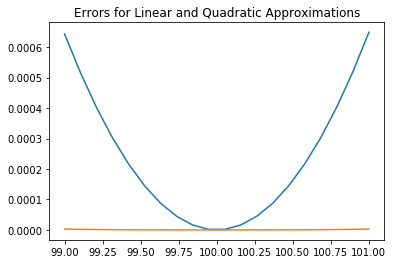

In [54]:
x0 = 100
y0 = 49.2166

def F(x,y):
    return (x**0.35 + 0.9*x - y)**(-2.5) - 0.95*(y**0.35 + 0.9*y)**(-2.5)
def Fx(x,y):
    return -(2.5*(0.9 + 0.35/x**0.65))/(x**0.35 + 0.9*x - y)**3.5
def Fy(x,y):
    return 2.5/(x**0.35 + 0.9*x - y)**3.5 + (2.375*(0.9 + 0.35/y**0.65))/(y**0.35 + 0.9*y)**3.5
def Fxx(x,y):
    return (8.75*(0.9 + 0.35/x**0.65)**2)/(x**0.35 + 0.9*x - y)**4.5 + 0.56875/(x**1.65*(x**0.35 + 0.9*x - y)**3.5)
def Fyy(x,y):
    return -0.95*((8.75*(0.9 + 0.35/y**0.65)**2)/(y**0.35 + 0.9*y)**4.5 + 0.56875/((y**0.35 + 0.9*y)**3.5 * y**1.65)) + 8.75/(x**0.35 + 0.9*x - y)**4.5
def Fyx(x,y):
    return -(8.75*(0.9 + 0.35/x**0.65))/(x**0.35 + 0.9*x - y)**4.5
def Fyyy(x,y):
    return -0.95*((-39.375*(0.9 + 0.35/y**0.65)**3)/(y**0.35 + 0.9*y)**5.5 - 0.938437/((y**0.35 + 0.9*y)**3.5 * y**2.65) - (5.97188*(0.9 + 0.35/y**0.65))/((y**0.35 + 0.9*y)**4.5*y**1.65)) + 39.375/(x**0.35 + 0.9*x - y)**5.5
def Fxxx(x,y):
    return (-39.375*(0.9 + 0.35/x**0.65)**3)/(x**0.35 + 0.9*x - y)**5.5 - (5.97188*(0.9 + 0.35/x**0.65))/(x**1.65*(x**0.35 + 0.9*x - y)**4.5) - 0.938437/(x**2.65*(x**0.35 + 0.9*x - y)**3.5)
def Fyxx(x,y):
    return (39.375*(0.9 + 0.35/x**0.65)**2)/(x**0.35 + 0.9*x - y)**5.5 + 1.99063/(x**1.65 * (x**0.35 + 0.9*x - y)**4.5)
def Fyyx(x,y):
    return (-39.375*(0.9 + 0.35/x**0.65))/(x**0.35 + 0.9*x - y)**5.5


Yx = - Fx(x0,y0)/Fy(x0,y0)
Yxx = - (Fyy(x0,y0)*(Yx**2) + 2*Fyx(x0,y0)*Yx + Fxx(x0,y0))/(Fy(x0,y0))
Yxxx = - (Fyyy(x0,y0)*(Yx**3) + 3*(Fyyx(x0,y0)*(Yx**2) + Fyy(x0,y0)*Yxx*Yx + Fyxx(x0,y0)*Yx + Fyx(x0,y0)*Yxx) + Fxxx(x0,y0))/Fy(x0,y0)

def ydiff(p, *args):
    y = p
    x, = args
    diff = (x**0.35 + 0.9*x - y)**(-2.5) - 0.95*(y**0.35 + 0.9*y)**(-2.5)
    
    return (diff)

def linear(x, y):
    return F(x,y) + Yx*(x-x0) 
def quadratic(x, y):
    return F(x,y) + Yx*(x-x0) + 0.5*Yxx*((x-x0)**2) 
def cubic(x, y):
    return F(x,y) + Yx*(x-x0) + 0.5*Yxx*((x-x0)**2) + (1/6)*Yxxx*((x-x0)**3)

print("First Order Coefficient: ", Yx)
print("Second Order Coefficient: ", Yxx)
print("Third Order Coefficient: ", Yxxx)

xgrid = np.linspace(99, 101, 20)

yvec = np.zeros((20,1))
veclin = np.zeros((20,1))
vecquad = np.zeros((20,1))
veccubic = np.zeros((20,1))


for i in range(len(xgrid)):
    yvec[i] = fsolve(ydiff, (0.5), args = (i))

for i in range(len(xgrid)):
    veclin[i] = linear(xgrid[i], yvec[i])
    vecquad[i] = quadratic(xgrid[i], yvec[i])
    veccubic[i] = cubic(xgrid[i], yvec[i])

difflin = np.absolute(veclin - veccubic)
diffquad = np.absolute(vecquad - veccubic)
plt.plot(xgrid, difflin, label = "linear error")
plt.plot(xgrid, diffquad, label = "quadratic error")
plt.title("Errors for Linear and Quadratic Approximations")
plt.show()

# Exercise 4

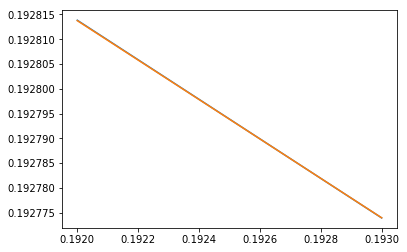

In [55]:
import numpy as np
from numba import jit
# import scipy.optimize as opt
import matplotlib.pyplot as plt

alpha = .35
beta = .98
rho = .95
sigma = .02

kbar = (alpha * beta) ** (1 / (1 - alpha))

import sympy as sy
from sympy import *

def F(x):
    a = (alpha * (x**(alpha-1)))
    b = ((x**alpha) - x)
    return a / b

def G(x):
    a = -(alpha*(x**(alpha-1))*(alpha+(x**(alpha-1))))
    b = ((x**alpha) - x)
    return a / b

def H(x):
    a = -(alpha**2)*(x**(2*(alpha-1)))
    b = ((x**alpha) - x)
    return a / b



def P(x):
    a = -G(x) + sqrt(G(x)**2 -4*F(x)*H(x))
    b = -G(x) + sqrt(G(x)**2 -4*F(x)*H(x))
    c = 2*F(x)
    if abs(a/c) <= abs(b/c):
        return a/c
    if abs(a/c) >= abs(b/c):
        return b/c
    else:
        raise ValueError

x = sy.symbols('x')

a = diff(P(x),x)

Pp = sy.lambdify(x, a)

P100 = P(100)
Pp100 = Pp(100)

x = np.linspace(.192,.193,100)
y = P100 * (x - kbar) + kbar
yp = .5*Pp100*(x-kbar) + P100 * (x - kbar) + kbar

plt.plot(x,y)
plt.plot(x,yp)

plt.show()